<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
Lab 1: Discrete and Continuous-Time Signals<br/>
    <small>Date: <01/29/26> <br/>
    <small>Section: <003>
</center></h1>

|Name|Sign|Time spent outside of lab|
|:---:|:---:|:---:|
|Student #1 Name [--%]|Jin Hyung Park||
|student #2 Name [--%]|||

||Below Expectations|Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|Completeness of the report||||
|Organization of the report: One-sided, with cover sheet, answers are in the same order as questions in the lab, copies of the questions||||
|Quality of figures: Correctly labeled with title, x-axis, y-axis, and name(s)||||
|Understanding of continuous and discrete-time signals (15 pts): figures, questions||||
|Ability to compute integral manually (30 pts): Manual computation, figures, Python codes, questions||||
|Ability to read audio signal (5 pts)||||
|Ability to define and display functions (1D and 2D): (35 pts) figures, Python codes, questions||||
|Understanding of sampling (15 pts): figures, questions||||

<h2 style="color:salmon;"><left>1. Continuous-Time Vs. Discrete-Time</left></h2>

The introduction in [Section 1](#1.-Introduction) mentioned the important issue of representing continuous-time signals on a computer. In the following sections, we will illustrate the process of *sampling*, and demonstrate the importance of the *sampling interval* to the precision of numerical computations.

<h3 style="color:salmon;"><left>1.1. Displaying Continuous-Time and Discrete-Time Signals in Python 3</left></h3>

It is common to graph a discrete-time signal as dots in a Cartesian coordinate system. This can be done in Python 3 by using the *stem* function from *matplotlib.pyplot*.

1. Create an array with a length of $31$, ranging from $0$ to $60$, and assign it to the variable $\mathtt{n}$. You may find the function either [np.linspace()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) or [np.arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) useful.
2. Apply $\sin$ function on this array and assign it to the variable $\mathtt{y}$. You should use the $\mathtt{\sin}()$ function in NumPy. Please refer to [np.sin()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html).
3. Stem plot this $\sin$ wave, and do not forget the title of the plot and the labels of the axes.

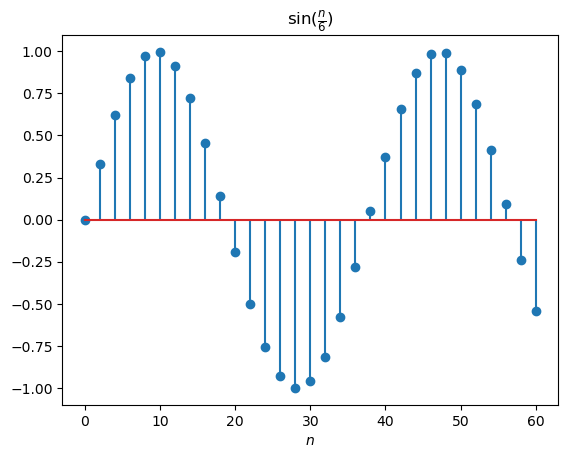

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1
n = np.linspace(0, 60, 31) # create an NumPy array, [0, 2, 4, ..., 58, 60]
# or
n = np.arange(0, 61, 2) 
# or
n = np.arange(61)[::2] # create an NumPy array, [0, 1, 2, ..., 59, 60], and then take every other element

# 2
y = np.sin(n / 6)

# 3
plt.stem(n, y)
plt.title(r"$\sin(\frac{n}{6})$")
plt.xlabel(r"$n$")
plt.show()

This plot shows the discrete-time signal formed by computing the values of the function $\sin(t/6)$ at points that are uniformly spaced at intervals of size $\frac{60-0}{31-1}=2$.

A digital computer cannot store all points of a continuous-time signal since this would require an infinite amount of memory. It is, however, possible to plot a signal which *looks like* a continuous-time signal, by computing the value of the signal at closely spaced points in time, and then connecting the plotted points with lines. The `plt.plot` function may be used to generate such plots.

<h3 style="color:red;"><left>Exercise 1.2</left></h3>

**_1. Use the following instructions to generate two continuous-time plots of the signal: $\sin(t/6)$._**

1. Initialize ```n1```, a NumPy array starting from 0 and ending at 60, with a step size of 2 (i.e., 31 elements).
2. Initialize ```z=sin(n1 / 6)```, using the function ```np.sin(x)```.
3. Create the plot, using the function ```plt.plot(x, y)```.

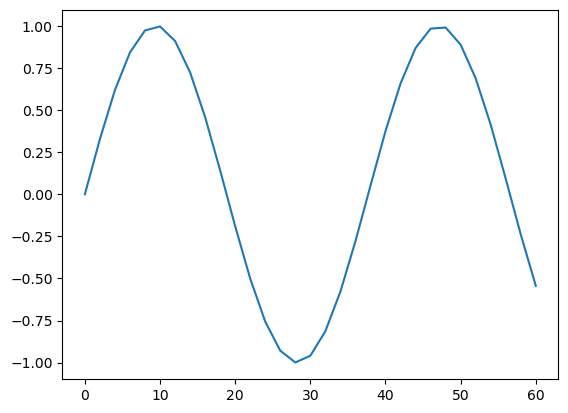

In [80]:
# insert your code here
n1 = np.arange(0, 61, 2)
z = np.sin(n1 / 6)
plt.plot(n1, z)

1. Initialize ```n2```, a NumPy array starting from 0 and ending at 60, with a step size of 10 (i.e., 7 elements).
2. Initialize ```w=sin(n2 / 6)```, using the function ```np.sin(x)```$.
3. Create the plot, using the function ```plt.plot(x, y)```.

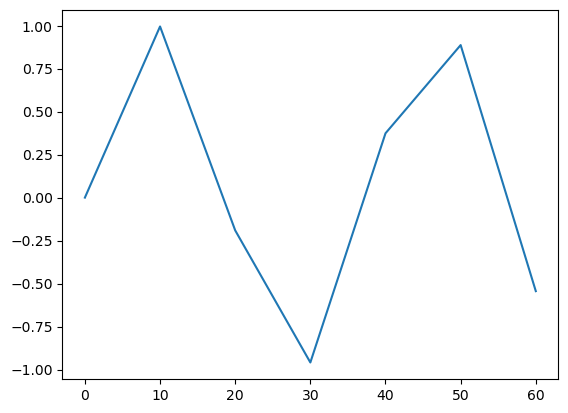

In [82]:
# insert your code here
n2 = np.arange(0, 61, 10)
w = np.sin(n2 / 6)
plt.plot(n2, w)

**_2. Comment on the accuracy of each of the continuous time plots._**

The first plot generates an appropriate sine graph, while the second does not. In the first case, the sine wave is represented almost intact because a sufficient number of points are sampled to capture its curvature. In contrast, the second graph fails to show a smooth sine wave because the step size is too large. As a result, the sampled points change abruptly, producing large jumps and preventing the curve from appearing continuous.

<h3 style="color:salmon;"><left>1.3. Vector Index versus Time</left></h3>

We saw in [Section 1.1](#1.1.-Displaying-Continuous-Time-and-Discrete-Time-Signals-in-Python-3) that the samples of a continuous-time signal, say $x(t)$, can be stored in a NumPy array. It is common practice to use the same variable for the vector and the signal. So one often denotes the samples of $x(t)$ by $x[n]$, even though this is an abuse of notation and lacks rigor.

It is important not to confuse the index of a vector $x[n]$ with the value of the independent variable of a function $x(t)$. For example, Python 3 can be used to represent the function $x(t)=\sin(t)$ by sampling $t$ at small intervals. The resulting samples may be stored in a NumPy array called `x` in your program. However, it is important to realize that the function $x$ and the NumPy array `x` in the program are not the same things. The following code illustrates this.

In [6]:
t1 = np.linspace(-10, 10, 201)
x = np.sin(t1)

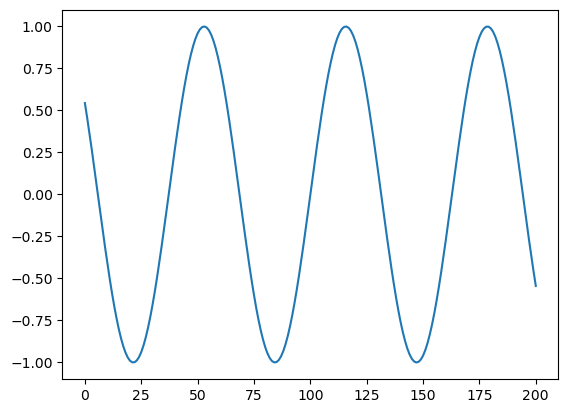

In [7]:
plt.plot(x)
plt.show()

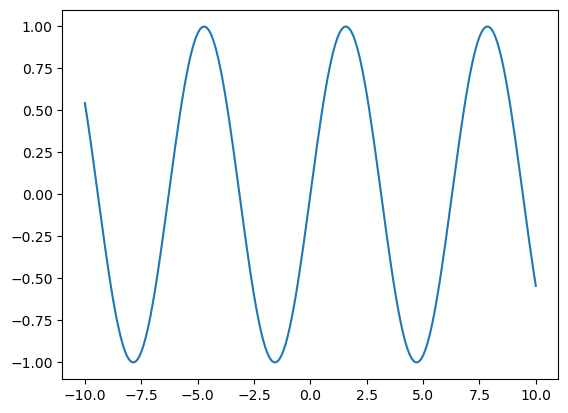

In [8]:
plt.plot(t1, x)
plt.show()

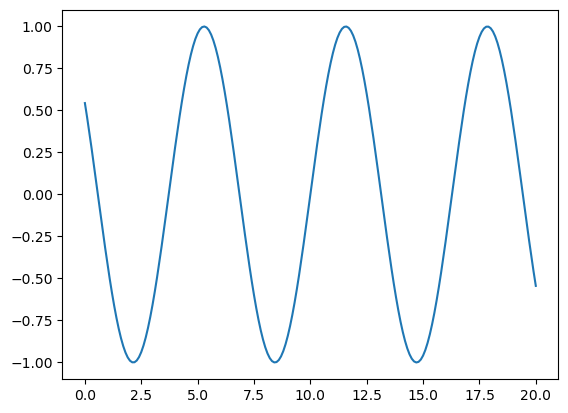

In [9]:
t2 = np.linspace(0, 20, 201)
plt.plot(t2, x)
plt.show()

<h3 style="color:red;"><left>Exercise 1.4</left></h3>

**1. Run the code above and explain the difference between the three signals represented.** 

**Hint:** Click on the cell and change it from being a ```Markdown``` type to ```Code``` type.

In the first plot, the x-axis represents the array index (0 to 200) rather than a time variable, because the signal is plotted without explicitly specifying the time vector. In the second plot, the x-axis ranges from −10 to 10 since the signal is plotted against the time variable t1, which correctly represents time. In the last plot, a different time interval from 0 to 20 is chosen for the x-axis by using t2, and the same signal values are plotted against this new time vector. In all three cases, the amplitude remains the same because the signal values are generated from the same sine function.

**2. Write Python 3 code that would print the graph of $\sin(t)$ for the values of $t$ on the interval [3.5, 4.5]. (Pick a suitable increment for $t$.)**

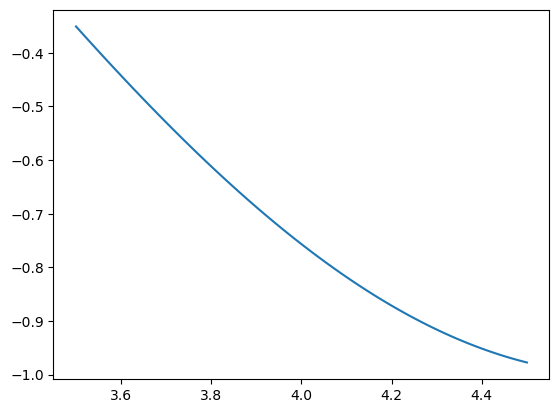

In [92]:
# insert your code here
t = np.linspace(3.5, 4.5, 100)
y = np.sin(t)
plt.plot(t,y)

<h3 style="color:red;"><left>Exercise 1.5</left></h3>

**1. Compute these two integrals on a blank sheet of paper. Do the computations manually.**

1. $\begin{align}\int_0^{2\pi}\sin^2(7t)dt\end{align}$
2. $\begin{align}\int_0^1e^tdt\end{align}$

1. $\pi$, 2. e - 1 

<h3 style="color:salmon;"><left>1.6. Numerical Computation of Continuous-Time Signals</left></h3>

One common calculation on continuous-time signals is integration. Figure 1 illustrates a method used for computing the widely used Riemann integral. The Riemann integral approximates the area under a curve by breaking the region into many rectangles and summing their areas. Each rectangle is chosen to have the same width $\Delta t$, and the height of each rectangle is the value of the function at the start of the rectangle's interval.

<figure>
    <img src="imgs/lab01_figure1.png" style="width:50%" alt="Figure 1">
    <em><center>Figure 1: Illustration of the Riemann integral</center></em>
</figure>

<h3 style="color:red;"><left>Exercise 1.7</left></h3>

**1. To see the effects of using a different number points to represent a continuous-time signal, write a Python function for numerically computing the integral of the function $\sin^2(7t)$ over the interval $[0,2\pi]$. The syntax of the function is**
```python
def integ1(N):
    """
    Parameters
    ---
    N: the number of rectangles
    
    Returns
    ---
    I: the approximate integral
    """
    return I
```
**where `I` is the result to be returned and `N` is the number of rectangles used to approximate the integral. This function should use the `np.sum` function and it should NOT contain any *for* loops!**

**Note:** Since Python is an *interpreted* language, *for* loops are relatively slow. Therefore, we will avoid using loops whenever possible.</font>

In [138]:
# insert your code here
def integ1(N):
    dt = (2 * np.pi) / N
    #x = np.linspace(0, 2 * np.pi, N, endpoint=False)
    x = np.arange(0, 2*np.pi, dt)
    height = ((np.sin(7 * x)) ** 2)
    I = np.sum(height * dt)
    return I

4.900099687974313e-30
3.141592653589795


**2. Write a script in a different block that evaluates $I(N)$ for $1\leqslant N\leqslant 100$, stores the result in a NumPy array and plots the resulting array as a function of $N$. This script may contain _for_ loops.**

**Note**: This script should call the function
```python
def integ1(N)
```
you just completed.

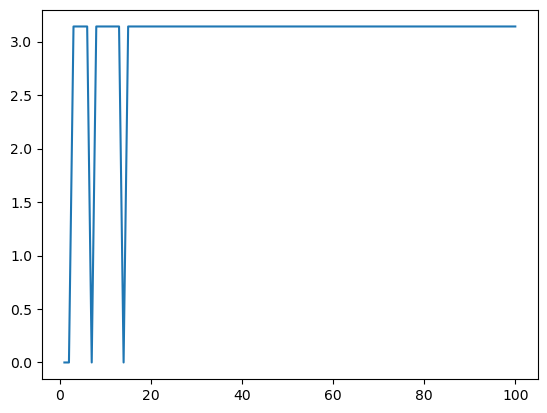

In [98]:
# insert your code here
str2 = []
for N in range(1, 101):
    str1 = integ1(N)
    str2.append(str1)
y = np.array(str2) 
plt.plot([n for n in range(1,101)], y)


**3. Write a second function `J = integ2(N)` which numerically computes the integral of $e^t$ on the interval [0, 1].** The syntax of the function is

```python
def integ2(N):
    """
    Parameters
    ---
    N: the number of rectangles
    
    Returns
    ---
    J: the approximate integral
    """
    return J
```

In [136]:
# insert your code here
def integ2(N):
    dt_exp = 1 / N
    x_exp = np.linspace(0, 1, N, endpoint=False)
    y_exp = np.exp(x_exp)
    J = np.sum(y_exp * dt_exp)
    return J

**4. Write a script in the next block that evaluates $J(N)$ for $1\leqslant N\leqslant 100$, stores the result in a NumPy array and plots the resulting array as a function of $N$. This script may contain _for_ loops.**

**Note**: This script should call the function
```python
def integ2(N)
```
you just completed.

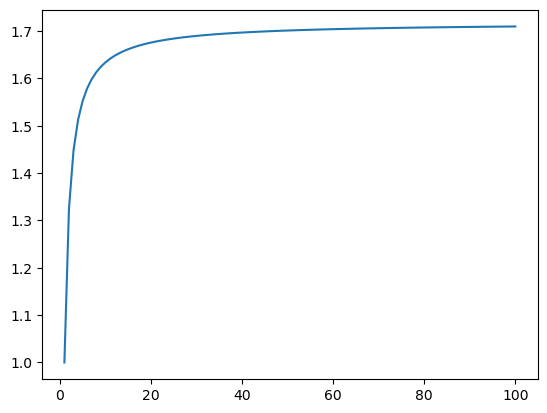

In [137]:
# insert your code here
exp_arry = []
for N2 in range (1, 101):
    temp_exp = integ2(N2)
    exp_arry.append(temp_exp)
y2 = np.array(exp_arry)
plt.plot([n3 for n3 in range (1, 101)], y2)
    

**5. Compare your results to the analytical solutions from Section 4.3. Explain why $I(7)=I(14)=0$.**

They have same value 0 since the number of rectagular lines up with signal's periodicity.

<h2 style="color:salmon;"><left>2. Processing of Speech Signals</left></h2>

Digital signal processing is widely used in speech processing for applications ranging from speech compression and transmission, to speech recognition and speaker identification. This exercise will introduce the process of reading and manipulating a speech signal.

<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. Import `soundfile` module, and use `sf` as the alias.** If `soundfile` is not already installed, use the command `pip install soundfile` to install it.

In [139]:
# insert your code here
import soundfile as sf
import IPython.display as ipd

**2. Do the following:**

1. Use the function [```speech, fs = sf.read("speech.au")```](https://pysoundfile.readthedocs.io/en/latest/#read-write-functions) to load file _speech.au_ into Python. Note that this function returns two arguments, where the first one is the data, and the second one is the sampling rate.
2. Play the signal, using the command ```ipd.Audio(speech, rate=fs)```.
3. Plot the signal on the screen as if it were a continuous-time signal (i.e., use the `plt.plot` command).

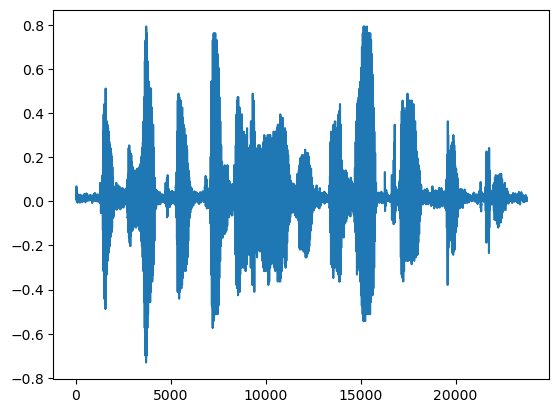

In [140]:
# insert your code here
speech, fs = sf.read("speech.au")
ipd.Audio(speech, rate=fs)
plt.plot(speech)

<h2 style="color:salmon;"><left>3. Special Functions</left></h2>

<h3 style="color:red;"><left>Exercise 3.1</left></h3>

**Plot the following two continuous-time functions over the specified intervals.**

1\. $\begin{align}\begin{cases}\frac{\sin(\pi t)}{\pi t}&t\neq0\\1&t=0\end{cases}\quad\text{for }t\in[-10\pi,10\pi]\end{align}$

2\. $\begin{align}\text{rect}(t)\quad\text{for }t\in[-2,2]\end{align}$

**Hint**: The function $\mathtt{rect}()$ may be computed in Python by using a Boolean expression. For example, if
```python
t = np.linspace(-10, 10, 201)
```
then $y=\text{rect}(t)$ may be computed using the command
```python
y = (abs(t) <= 0.5).astype(float)
```

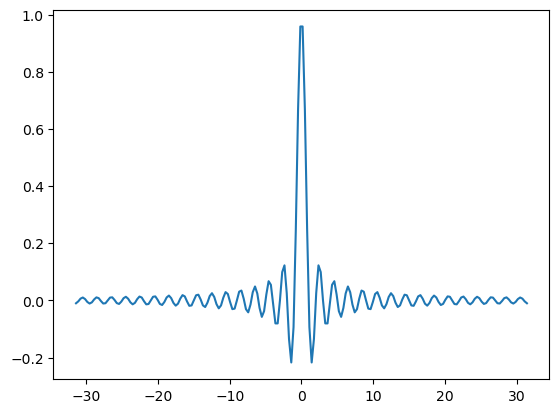

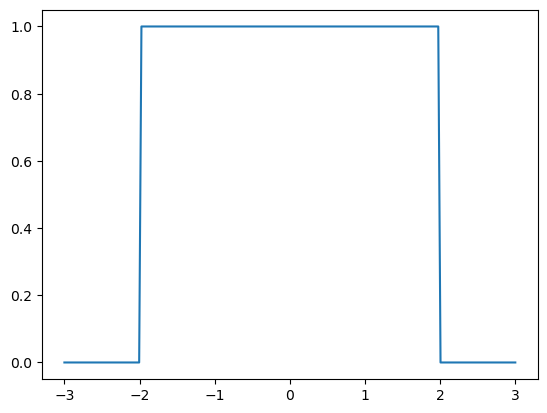

In [141]:
# insert your code here
plt.figure()
sin_t = np.linspace(-10*np.pi, 10*np.pi, 200)
sin_y = np.sinc(sin_t)
plt.plot(sin_t, sin_y)

plt.figure()
rec_t = np.linspace(-3, 3, 200)
rec_y = (abs(rec_t) <= 2).astype(float)
plt.plot(rec_t, rec_y)


<h3 style="color:red;"><left>Exercise 3.2</left></h3>

**1. For each of the following functions, write a Python function that takes two arguments, `a` and `n`. Then write the script below to stem those 2 discrete-time functions for $a=0.8$, $a=1.0$ and $a=1.5$, by calling the Python functions you just wrote.**

1\. $\begin{align}a^n(u[n]-u[n-10])\quad\text{for }n\in[-20,20]\end{align}$

2\. $\begin{align}\cos(\omega n)a^nu[n]\quad\text{for }\omega=\pi/4,\text{ and }n\in[-1,10]\end{align}$

The syntax of the functions should be:

```python
    def func_7_2_1(a, n):
        pass
```

and 

```python
    def func_7_2_2(a, n):
        pass
```

**Hint**: The unit step function $y=u[n]$ may be computed in Python 3 using the command
```python
y = (n >= 0).astype(float)
```
where $\mathtt{n}$ is a vector of values of time indices.

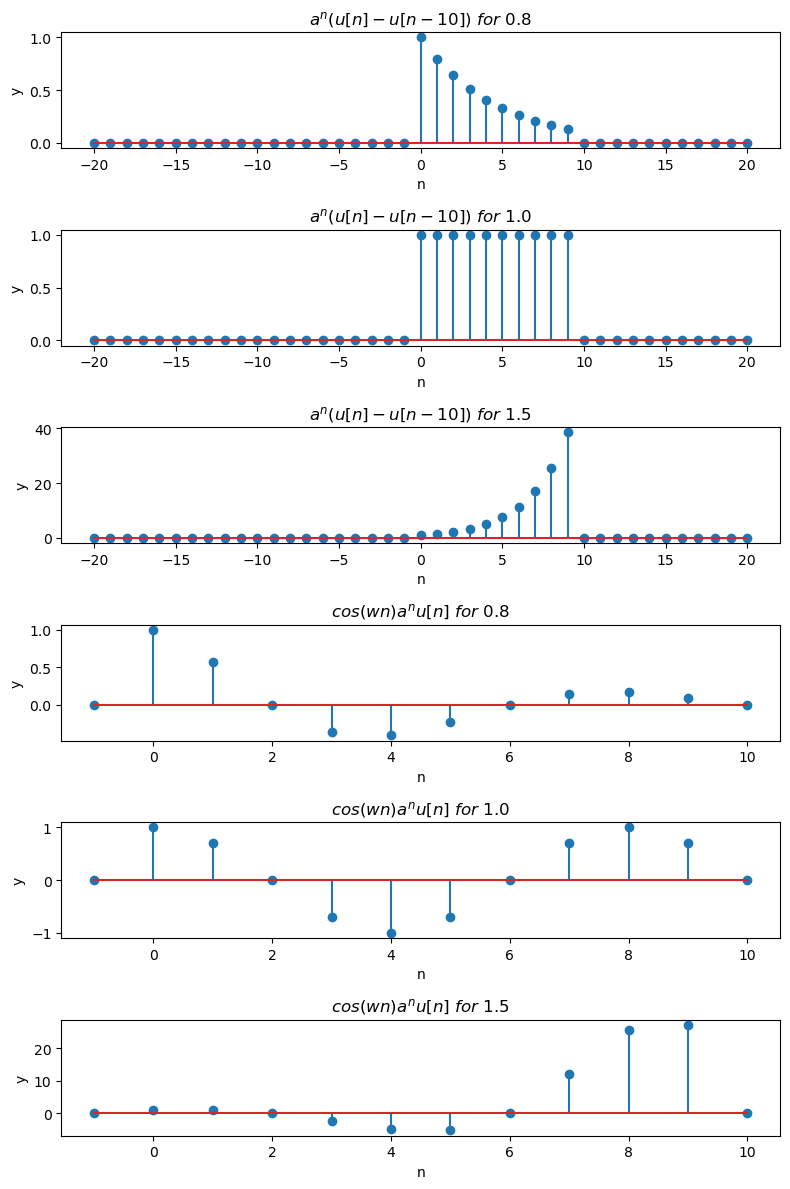

In [142]:
# insert your code here
n_val2 = np.arange(-20, 21)
n_val3 = np.arange(-1, 11)
a_val2 = [0.8, 1.0, 1.5]

def func_7_2_1(a, n):
    unit_n = ((n >= 0) & (n < 10)).astype(float)
    mul_exp = (a ** n) * unit_n
    return (mul_exp)
    
plt.figure(figsize=(8,12))
for ind1, a in enumerate(a_val2):
    plt.subplot(6,1,ind1 + 1)
    y_val2 = func_7_2_1(a, n_val2)
    plt.stem(n_val2, y_val2)
    plt.title(fr'$a^n(u[n] - u[n - 10]) \ for \ ${a}')
    plt.xlabel('n')
    plt.ylabel('y')
    
def func_7_2_2(a, n):
    return ((np.cos((np.pi / 4) * n)) * (a ** n) * ((n >= 0).astype(float)))
for ind2, a in enumerate(a_val2):
    plt.subplot(6,1,ind2 + 4)
    y_val2 = func_7_2_2(a, n_val3)
    plt.stem(n_val3, y_val2)
    plt.title(fr'$cos(wn) a^n u[n] \ for \ ${a}')
    plt.xlabel('n')
    plt.ylabel('y')

plt.tight_layout()
    

<h2 style="color:salmon;"><left>4. Sampling</left></h2>

The word _sampling_ refers to the conversion of a continuous-time signal into a discrete-time signal. The signal is converted by taking its value, or sample, at uniformly spaced points in time. The time between two consecutive samples is called the _sampling period_. For example, a sampling period of $0.1$ seconds implies that the value of the signal is stored every $0.1$ seconds.

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

Consider the signal $f(t)=\sin(2\pi t)$. We may form a discrete-time signal, $x[n]$, by sampling this signal with a period of $T_s$. In this case,

$\begin{align}x(n)=f(T_sn)=\sin(2\pi T_sn)\end{align}$

**1. Firstly,using the previously presented signal, complete the following function**

```python
def func_8(Ts, n):
    pass
```

In [143]:
# insert your code here
def func_8(Ts, n):
    conti_y = np.sin(2*np.pi*Ts*n)
    return conti_y

**2. Use the ```plt.stem``` to plot the function $f(T_sn)$ defined above for the following values of $T_s$ and $n$.** 

**Note:** Your code should call the function defined above.

1\. $\begin{align}T_s=1/10,0\leqslant n\leqslant 100;\quad\text{axis}([0, 100, -1, 1])\end{align}$

2\. $\begin{align}T_s=1/3,0\leqslant n\leqslant 30;\quad\text{axis}([0, 30, -1, 1])\end{align}$

3\. $\begin{align}T_s=1/2,0\leqslant n\leqslant 20;\quad\text{axis}([0, 20, -1, 1])\end{align}$

4\. $\begin{align}T_s=10/9,0\leqslant n\leqslant 9;\quad\text{axis}([0, 9, -1, 1])\end{align}$

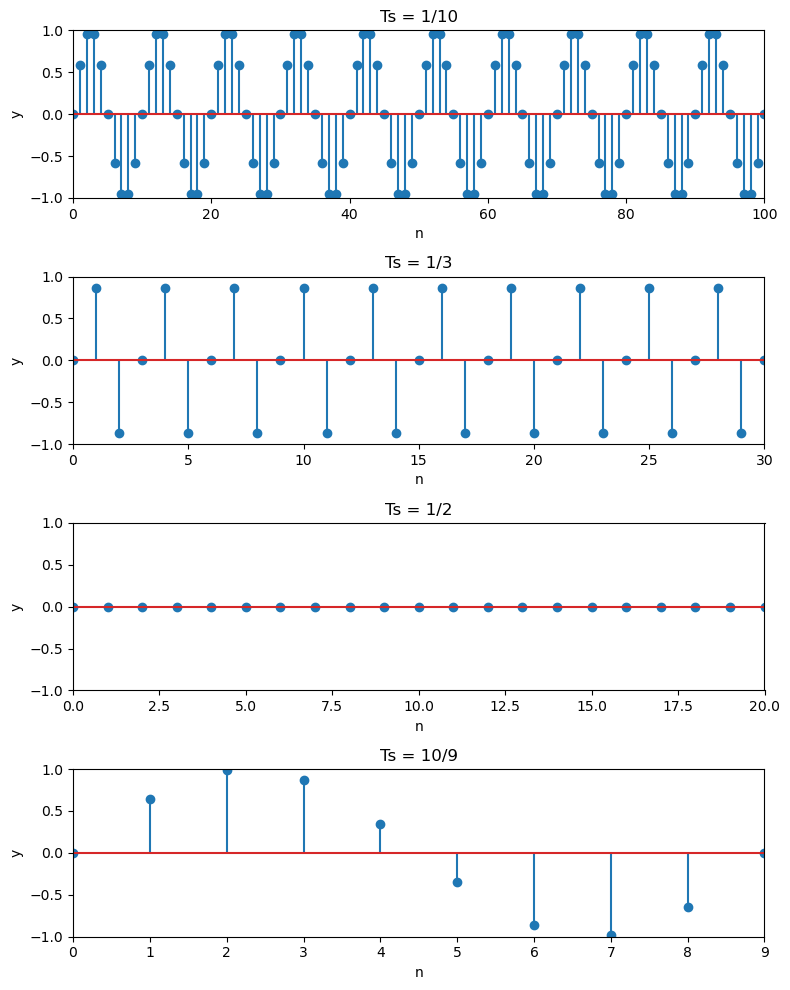

In [149]:
# insert your code here
plt.figure(figsize=(8,10))
n1 = np.arange(0, 101)
y1 = func_8(1/10, n1)
plt.subplot(4,1,1)
plt.stem(n1, y1)
plt.axis([0,100,-1,1])
plt.title(f'Ts = 1/10')
plt.xlabel('n')
plt.ylabel('y')

n2 = np.arange(0, 31)
y2 = func_8(1/3, n2)
plt.subplot(4,1,2)
plt.stem(n2, y2)
plt.axis([0,30,-1,1])
plt.title(f'Ts = 1/3')
plt.xlabel('n')
plt.ylabel('y')

n3 = np.arange(0, 21)
y3 = func_8(1/2, n3)
plt.subplot(4,1,3)
plt.stem(n3, y3)
plt.axis([0,20,-1,1])
plt.title(f'Ts = 1/2')
plt.xlabel('n')
plt.ylabel('y')

n4 = np.arange(0, 10)
y4 = func_8(10/9, n4)
plt.subplot(4,1,4)
plt.stem(n4, y4)
plt.axis([0,9,-1,1])
plt.title(f'Ts = 10/9')
plt.xlabel('n')
plt.ylabel('y')
plt.tight_layout()

**3. Discuss your results obtained from the 4 plots above. How does the sampled version of the signal with $T_s=1/10$ compare to those with $T_s=1/3$, $T_s=1/2$ and $T_2=10/9$?**

Compared to the other cases, Ts = 1/10 has the highest sampling rate, meaning it uses the most discrete samples to represent one period of the signal. As shown in the first figure, this case provides the most detailed discrete representation before the signal repeats its periodicity. For 1/3, it hit 3 sample before periodity. For 1/2, the samples always occur at integer multiples of pi so the signal value is zero for all n, producing a constant zero sequence. For 10/9, the signal takes 9 samples to complete one cycle, and due to the periodicity of discrete-time sinusoids, it equals to Ts = 1/9.

<h2 style="color:salmon;"><left>5. 2-D Signals</left></h2>

So far we have only considered 1-D signals such as speech signals. However, 2-D signals are also very important in digital signal processing. For example, the elevation at each point on a map, or the color at each point on a photograph are examples of important 2-D signals. As in the 1-D case, we may distinguish between continuous-space and discrete-space signals. However in this section, we will restrict attention to discrete-space 2-D signals.

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

When working with 2-D signals, we may choose to visualize them as images or as 2-D surfaces in a 3-D space. To demonstrate the differences between these two approaches, we will use two different display techniques in Python. Do the following:

**1. Use the ```np.meshgrid``` command to generate the discrete-space 2-D signal $\begin{align}f[m,n]=255|\text{sinc}(0.2m)\text{sinc}(0.2n)|\end{align}$ for $-20\leqslant m \leqslant 20$ and $-20 \leqslant n\leqslant 20$.**

In [150]:
# insert your code here
m1 = np.arange(-20, 21)
n1 = np.arange(-20, 21)
M, N = np.meshgrid(m1, n1)
y_2D = 255*np.abs(np.sinc(0.2*M)*np.sinc(0.2*N))

**2. Use the following code to display the signal as a surface plot.**

In [151]:
# refer to https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def mesh_plot(X, Y, Z, title, xlabel, ylabel):
    fig = plt.figure()
    # ax = fig.gca(projection='3d')
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=2, antialiased=True)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

**3. Display the signal as an image. Use the function attribute ```cmap='gray'``` inside the ```plt.imshow()``` command to obtain a grayscale image.**

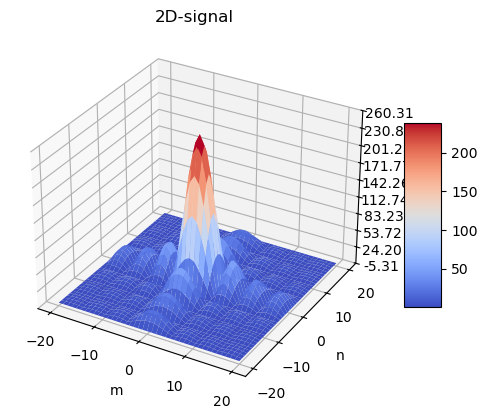

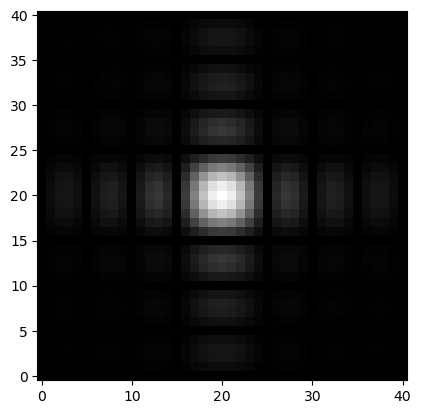

In [153]:
# insert your code here
mesh_plot(M, N, y_2D, '2D-signal', 'm', 'n')
plt.imshow(y_2D, cmap='gray')

**4. For which applications do you think the surface plot works better? When would you prefer the image?**

A surface plot is more beneficial when the 3-D structure of a signal needs to be analyzed, since it allows visualization from different spatial perspectives. It is especially useful in fields that require understanding amplitude variations and the shapes of peaks, such as when visualizing complex mathematical functions.
An image representation is more useful for evaluating intensity levels, spatial patterns, and symmetry, such as in applications involving image analysis and pattern recognition.

<h2 style="color:salmon;"><left>6. 2D Random Signals - Optional Exercise</left></h2>

The objective of this section is to show how to recover a signal from noisy observations of that signal.

**1. Generate one $100\times100$ image with a $10\times10$ white square in the middle (pixel value $110$) on a black background (pixel value $100$). Add a random number to each pixel value of the image. The random number for each pixel should be generated independently following a uniform distribution on the interval $[-100,100]$. Use the Python command ```np.random.rand()``` to generate these random numbers.**

**Hint**: While command ```np.random.rand()``` generates a sample of a uniform random variable on the interval $[0,1]$, the command ```np.random.rand() - 3``` will generate a sample from uniform random variable on the interval $[-3,-2]$, and the command ```7 * np.random.rand()``` will generate a sample from uniform random variable on the interval $[0,7]$.

In [ ]:
# insert your code here


**2. Having added a random number to each pixel of the square image, you have created a "noisy observation" of the square image. Display the resulting 2D signal (the noisy observation) as an image using the command `plt.imshow()` (e.g., `plt.imshow(X,[])`.)**

In [ ]:
# insert your code here


**3. Can you distinguish the square in the center of the noisy image?**

insert your answer here

**4. Repeat this procedure to generate 99 additional (different) noisy observations of the image of the square. Obtain a new image by averaging the pixel values of each of these $100$ images. Plot the resulting new image.**

**Hint**: Create a 3-d NumPy array by ```image_arr = np.zeros((N, H, W))```, where $N=100$ is the number of images, $H=100$ is the height of the image and $W=100$ is the width of the image. You may assign values to this 3-d array by using a *for* loop, then use the function ```np.mean(images, axis=0)``` to take the average of the pixel values of each of these $100$ images.

In [ ]:
# insert your code here


**5. Can you distinguish the square in the center of the new image?**

insert your answer here